<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Задание" data-toc-modified-id="Задание-1">Задание</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Основная-часть" data-toc-modified-id="Основная-часть-1.0.1">Основная часть</a></span></li><li><span><a href="#Дополнительная-часть" data-toc-modified-id="Дополнительная-часть-1.0.2">Дополнительная часть</a></span></li></ul></li></ul></li><li><span><a href="#Описания-полей" data-toc-modified-id="Описания-полей-2">Описания полей</a></span></li></ul></div>

# Задание

### Основная часть

* Попробовать построить все графики из тех, что были на уроке по Seaborn
* Попробовать графики из тех, что были на уроке в Matplotlib и Plotly

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [2]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

age gender city_type  full_mob  ml_balance  cl_balance_0m  loan_balance_0m  \
0   71    NaN      <100       103         0.0            0.0              0.0   
1   49    NaN      Mega        81         0.0            0.0              0.0   
2   56    NaN      Mega        81         0.0            0.0              0.0   
3   47    NaN      Mega        81         0.0            0.0              0.0   
4   74    NaN      Mega        81         0.0            0.0              0.0   

   td_balance_0m  casa_balance_0m  dc_trx_cnt  ...  min_loan_balance_1q  \
0            0.0           0.0000           0  ...                  0.0   
1            0.0        3272.9367           0  ...                  0.0   
2            0.0        6249.7550           6  ...                  0.0   
3            0.0       14354.9370           0  ...                  0.0   
4            0.0       91511.7691           0  ...                  0.0   

   max_loan_balance_1q  avg_loan_balance_1Y  min_cl_balance_1q  \
0                  0.0                  0.0                0.0   
1                  0.0                  0.0                0.0   
2                  0.0                  0.0                0.0   
3                  0.0                  0.0                0.0   
4                  0.0                  0.0                0.0   

   max_cl_balance_1q  avg_cl_balance_1Y  loan_to_deposit  Avg_trx  \
0                0.0                0.0              NaN      NaN   
1                0.0                0.0              NaN      NaN   
2                0.0                0.0              NaN   854.67   
3                0.0                0.0              NaN      NaN   
4                0.0                0.0              NaN      NaN   

   avgtrx_to_balance          nbi  
0                NaN          NaN  
1                NaN    28.762952  
2           0.083467  1973.335539  
3                NaN   364.008556  
4                NaN  6651.416562  

[5 rows x 28 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
age                    50000 non-null int64
gender                 49277 non-null object
city_type              50000 non-null object
full_mob               50000 non-null int64
ml_balance             50000 non-null float64
cl_balance_0m          50000 non-null float64
loan_balance_0m        50000 non-null float64
td_balance_0m          50000 non-null float64
casa_balance_0m        50000 non-null float64
dc_trx_cnt             50000 non-null int64
dc_trx_sum             50000 non-null float64
income                 50000 non-null float64
min_casa_balance_1q    50000 non-null float64
max_casa_balance_1q    50000 non-null float64
avg_casa_balance_1Y    50000 non-null float64
min_td_balance_1q      50000 non-null float64
max_td_balance_1q      50000 non-null float64
avg_td_balance_1Y      50000 non-null float64
min_loan_balance_1q    50000 non-null float64
max_loan_balance_1q    50

In [26]:
sns.relplot(x='age', 
            y='ml_balance', 
            data=df, 
            kind='line')
plt.gcf().set_size_inches((10, 5))
plt.title('Выявления возраста, для которого интересна ипотека', size=15, color='b');

In [32]:
sns.relplot(x='age',  
            y='cl_balance_0m', 
            hue='gender',
            data=df, 
            kind='line')
plt.gcf().set_size_inches((15, 5))
plt.title('Соотношение возраста и пола к потребительским кредитам', size=15, color='b');

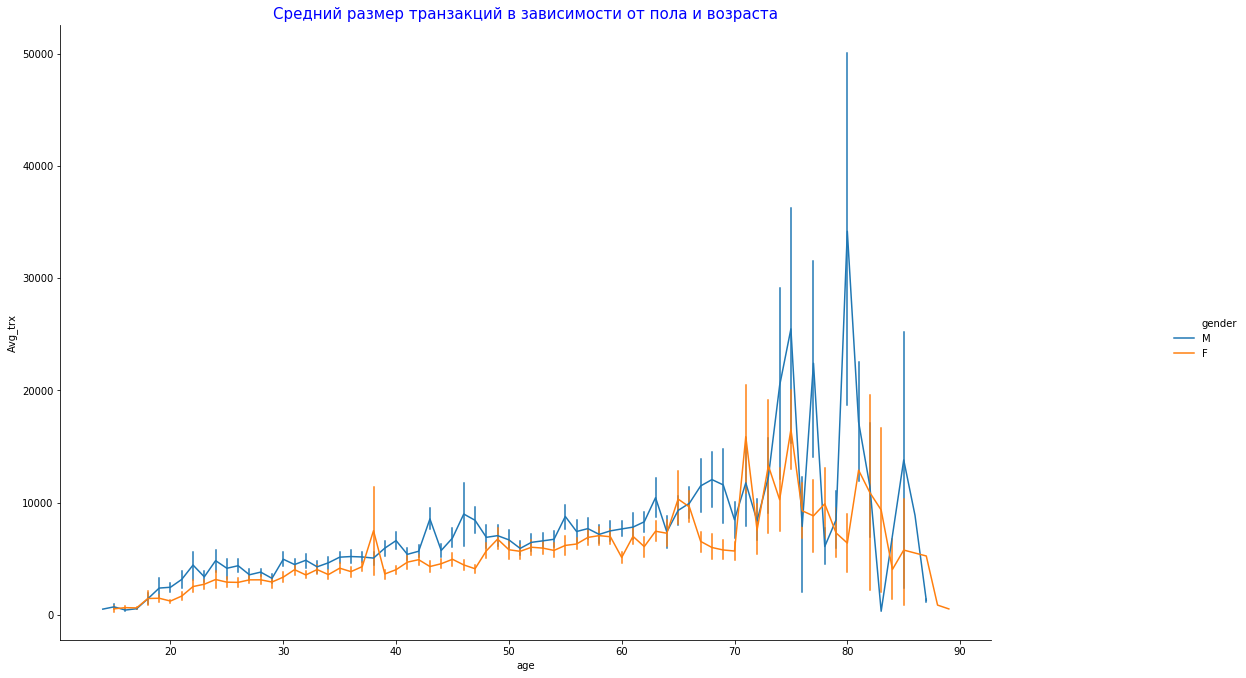

In [48]:
sns.relplot(x='age',  
            y='Avg_trx', 
            hue='gender', 
            data=df,
            kind='line',
           err_style="bars", ci=70)
plt.gcf().set_size_inches((20, 10))
plt.title('Средний размер транзакций в зависимости от пола и возраста', size=15, color='b');

Text(0.5, 1, 'Все кредиты по городам и в зависимости от пола')

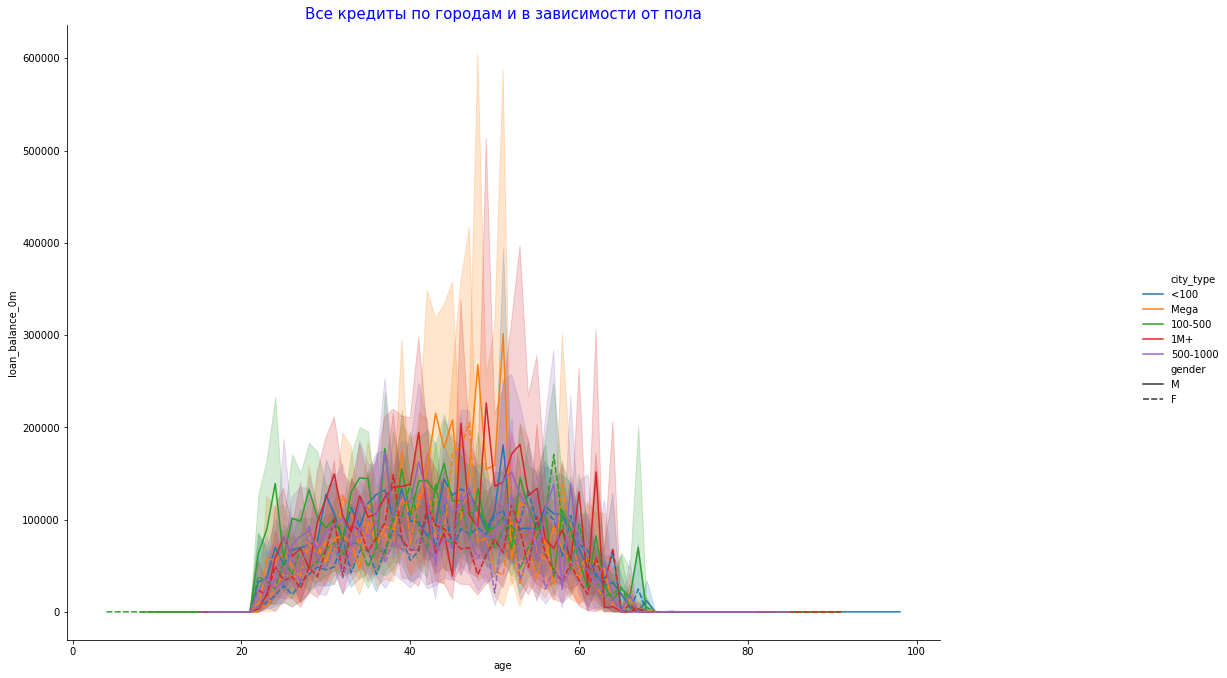

In [44]:
sns.relplot(x='age',  
            y='loan_balance_0m', 
            hue='city_type',
            style='gender', 
            kind='line', 
            data=df)
plt.gcf().set_size_inches((20, 10))
plt.title('Все кредиты по городам и в зависимости от пола', size=15, color='b')

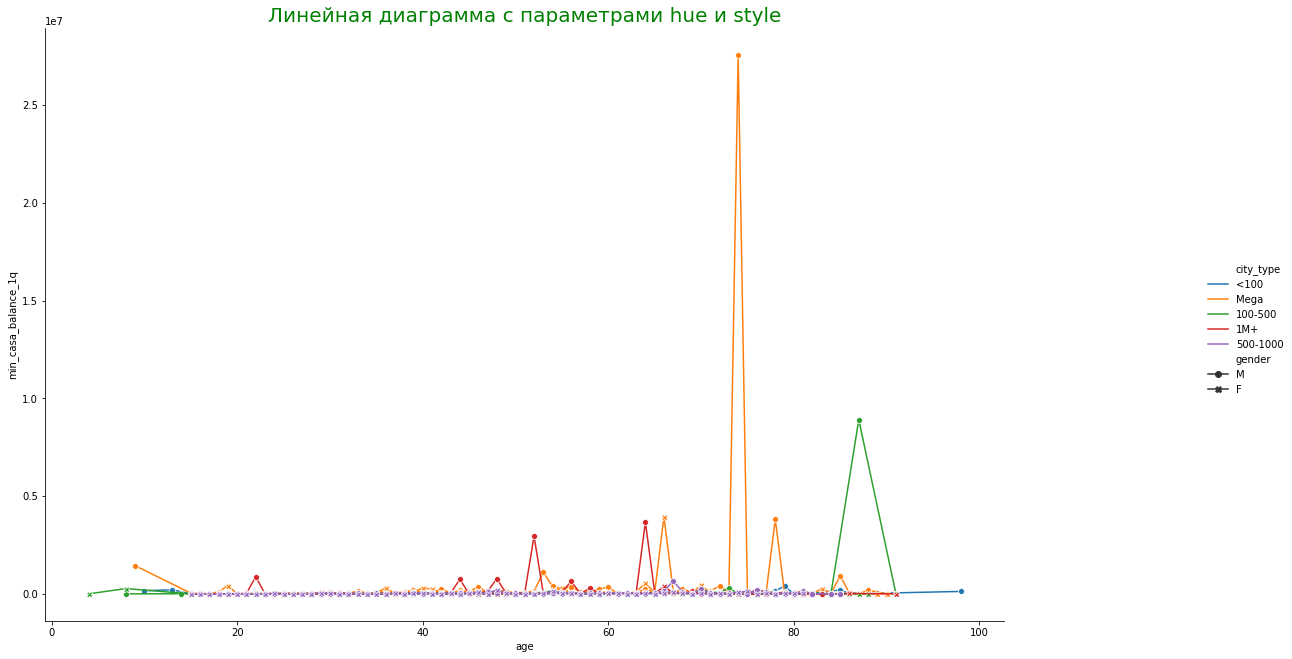

In [50]:
sns.relplot(x='age',  
            y='min_casa_balance_1q', 
            hue='city_type',
            style='gender', 
            dashes=False, 
            markers=True,
            data=df, kind='line', ci=None)
plt.gcf().set_size_inches((20, 10))
plt.title('Показатели по счетам за квартал, в зависимости от города и пола', size=15, color='b');

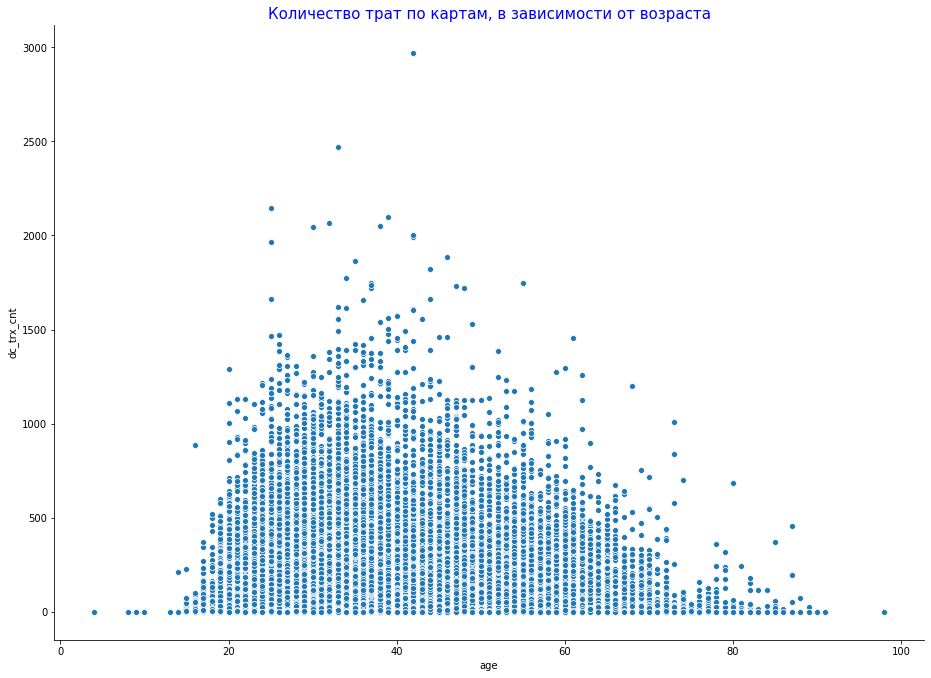

In [55]:
sns.relplot(x='age',  
            y='dc_trx_cnt',
            data=df, 
            kind='scatter')
plt.gcf().set_size_inches((15, 10))
plt.title('Количество трат по картам, в зависимости от возраста', size=15, color='b');

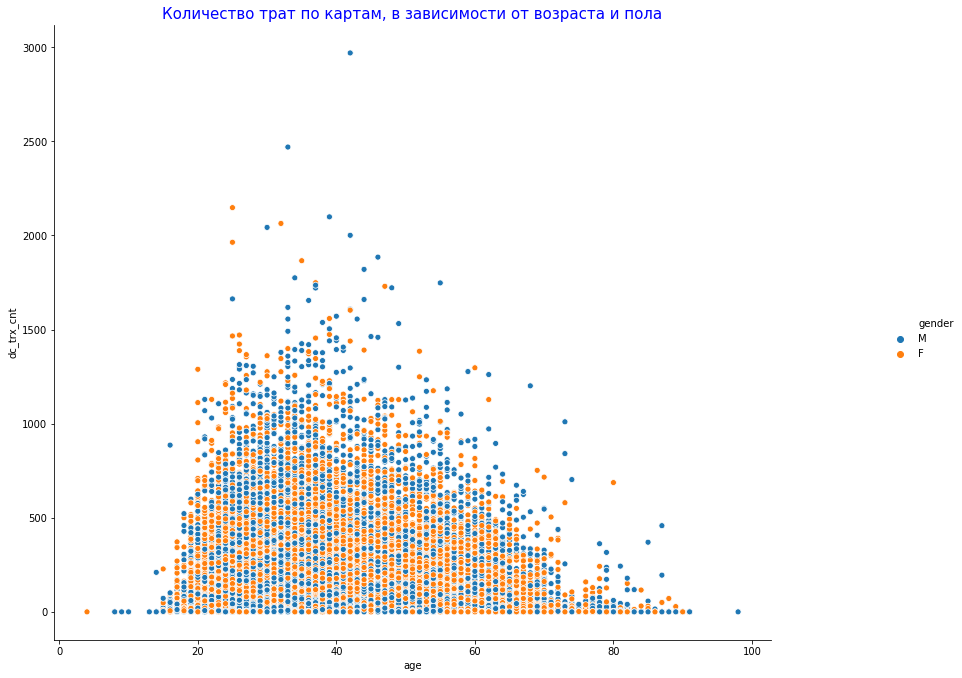

In [57]:
sns.relplot(x='age',  
            y='dc_trx_cnt',
            hue='gender',
            data=df)
plt.gcf().set_size_inches((15, 10))
plt.title('Количество трат по картам, в зависимости от возраста и пола', size=15, color='b');

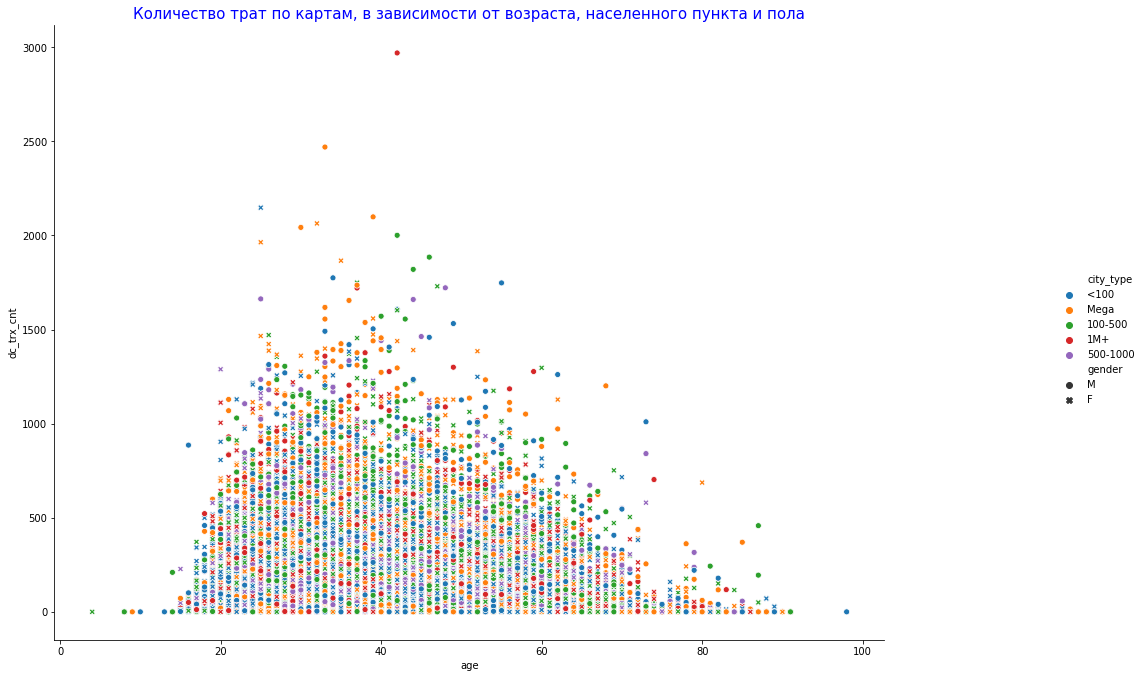

In [60]:
sns.relplot(x='age',  
            y='dc_trx_cnt',
            hue='city_type', 
            style='gender', 
          
            data=df)
plt.gcf().set_size_inches((18, 10))
plt.title('Количество трат по картам, в зависимости от возраста, населенного пункта и пола', size=15, color='b');

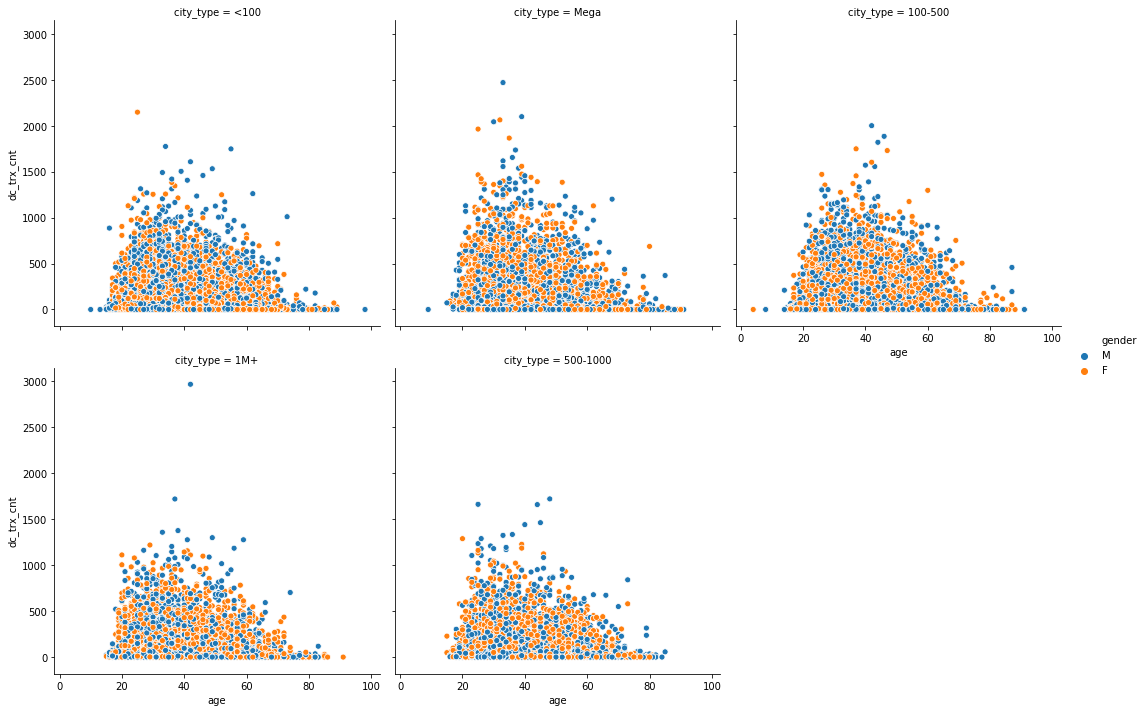

In [64]:
# Диаграмма рассеяния с параметром Hue и дополнительными переменными, для отражения средних трат по картам, в зависимости от возраста, насленного пункта и пола
sns.relplot(
    x='age',  
    y='dc_trx_cnt',
    hue='gender',
    col='city_type',
    col_wrap=3,
    data=df,
    height=5
);

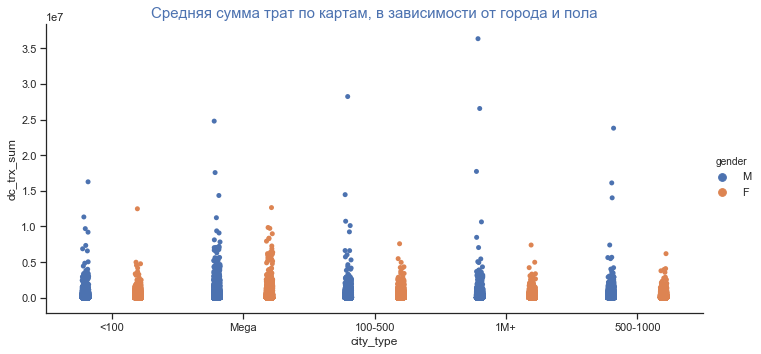

In [74]:
sns.set(style="ticks", color_codes=True)
sns.catplot(
    x='city_type',
    y='dc_trx_sum', 
    data=df, 
    hue='gender', 
    jitter=0.05,
    height=5, 
    aspect=2, 
    kind='strip', 
    dodge=True) 
plt.title('Средняя сумма трат по картам, в зависимости от города и пола', size=15, color='b');

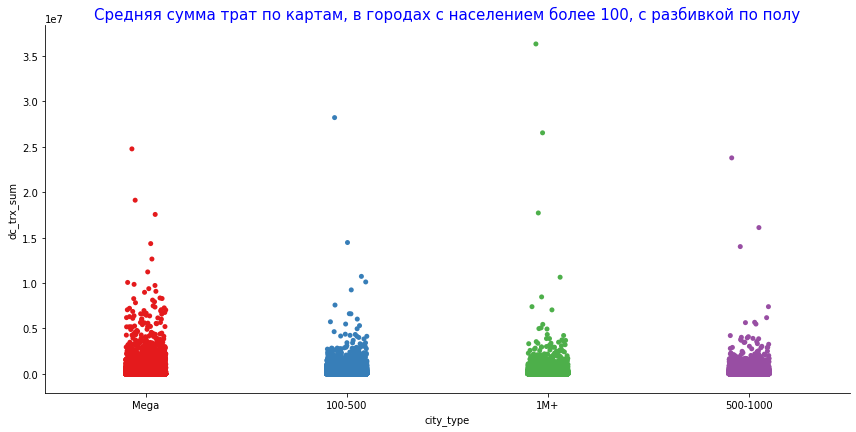

In [12]:
sns.catplot(
    x='city_type',
    y='dc_trx_sum', 
    data=df.query("city_type != '<100'"), 
    order=['Mega',  '100-500', '1M+', '500-1000'],
    palette='Set1', 
    height=6,
    aspect=2); 

plt.title('Средняя сумма трат по картам, в городах с населением более 100, с разбивкой по полу', size=15, color='b');

KeyboardInterrupt: 

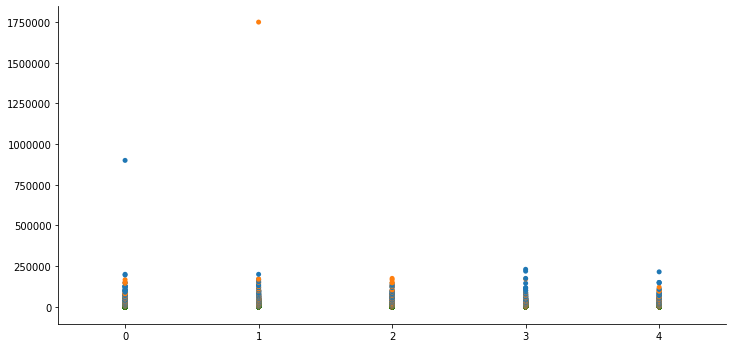

In [14]:
sns.catplot(
   x='city_type',
    y='Avg_trx', 
    data=df, 
    hue='gender',
    kind='swarm',
    height=5, 
    aspect=2)
plt.title('swarmplot', size=20, color='g');

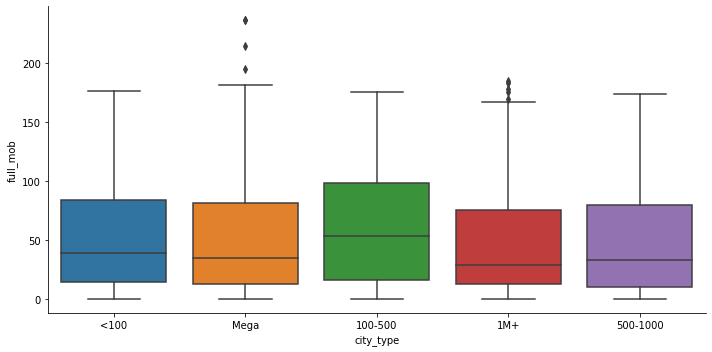

In [24]:
# Среднее значение по возрасту и длительности взаимоотношений с банком
sns.catplot(
    x='city_type', 
    y='full_mob', 
    data=df, 
    kind='box', 
    height=5, 
    aspect=2
); 

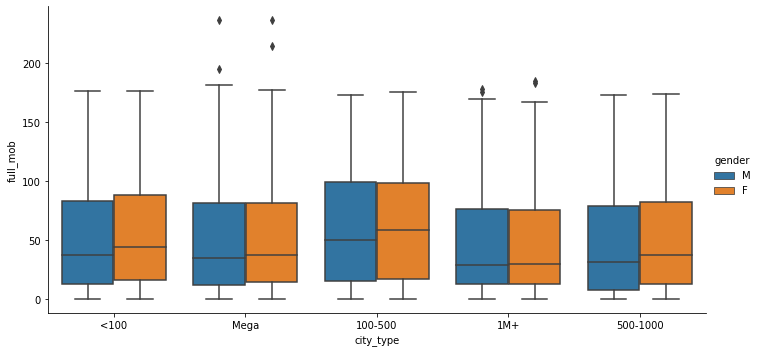

In [25]:
# Среднее значение по возрасту, длительности взаимоотношений с банком и сравнением по полу
sns.catplot(
    x='city_type', 
    y='full_mob', 
    data=df, 
    kind='box', 
    hue='gender',
    height=5, 
    aspect=2); 

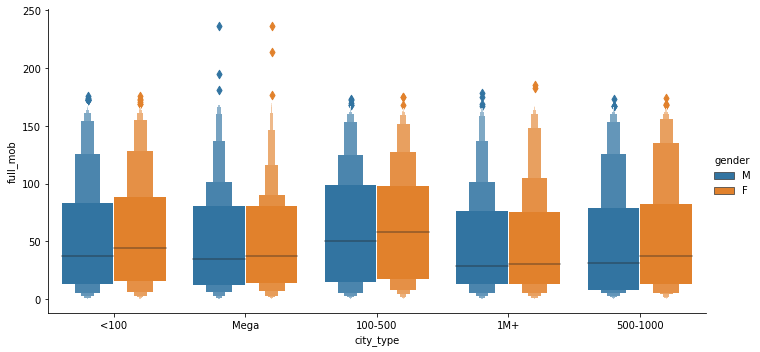

In [26]:
sns.catplot(
    x='city_type', 
    y='full_mob', 
    data=df, 
    kind='boxen', 
    hue='gender',
    height=5, 
    aspect=2);

In [38]:
from numpy import median

plt.figure(figsize=(9,4))
b = sns.barplot(
    x='city_type', 
    y='dc_trx_cnt', 
    data=df, 
    estimator=sum, 
    palette='husl')

b.set(yscale='log', ylim=[50000, 10000000])
sns.despine()

for bar in b.patches:
    b.annotate(
        "{:,}".format(bar.get_height()),
        (bar.get_x()+bar.get_width()/2.,
        bar.get_height()),
        ha='center',
        va='center',
        xytext=(0,10),
        textcoords='offset points', 
        color='b', 
        weight='bold'
    )

plt.title('Количество трат по картам в зависимости от населенного пункта', size=15, color='b', 
          weight='bold');

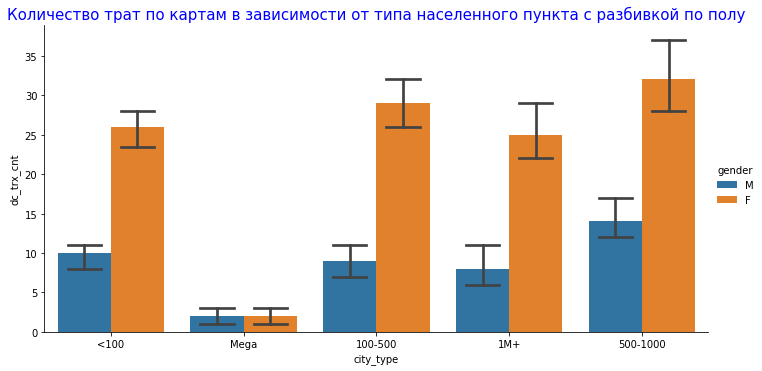

In [43]:
sns.catplot(
    x='city_type', 
    y='dc_trx_cnt', 
    data=df, 
    kind='bar', 
    hue='gender', 
    estimator=median, 
    capsize=0.25, 
    height=5, 
    aspect=2); 

plt.title('Количество трат по картам в зависимости от типа населенного пункта с разбивкой по полу',
          size=15, 
          color='b', 
          weight='normal');

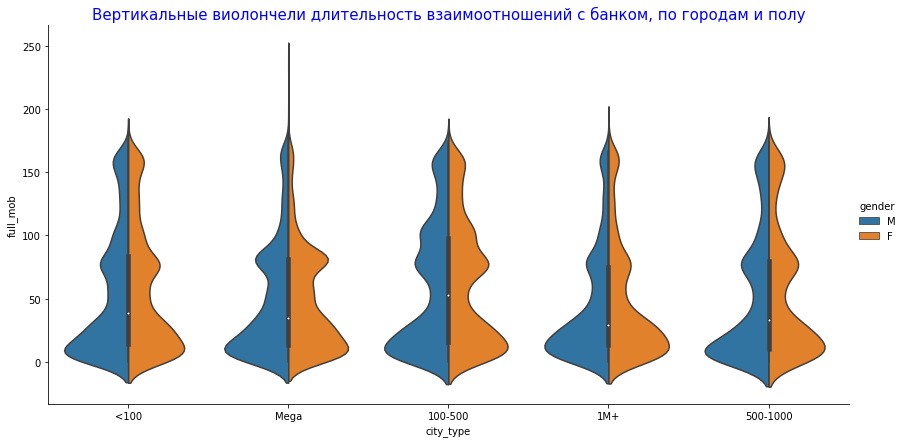

In [50]:
sns.catplot(
    x='city_type', 
    y='full_mob', 
    data=df, 
    kind='violin', 
    hue='gender', 
    split=True, 
    height=6, 
    aspect=2) 

plt.title('Вертикальные виолончели длительность взаимоотношений с банком, по городам и полу', size=15, color='b', weight='normal');

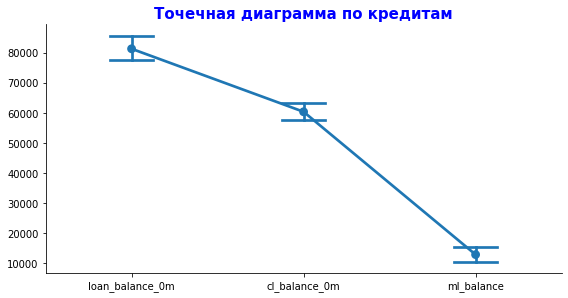

In [54]:
sns.catplot(
    data=df, 
    kind='point', 
    ci=99.99, 
    capsize=0.25, 
    height=4,        
    aspect=2, 
    order=['loan_balance_0m', 'cl_balance_0m', 'ml_balance']
)
plt.title('Точечная диаграмма по кредитам', size=15, color='b', weight='bold'); 

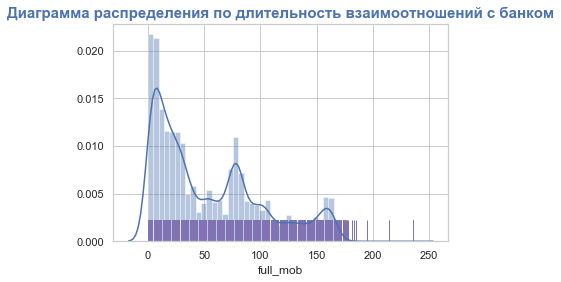

In [66]:
sns.set(style='whitegrid', color_codes=True)

sns.distplot(
    df.full_mob,
    color='b', 
    rug=True, 
    rug_kws={"color": 'm', "height": 0.1}
)
plt.title('Диаграмма распределения по длительность взаимоотношений с банком', size=15, color='b', weight='bold')
plt.show();

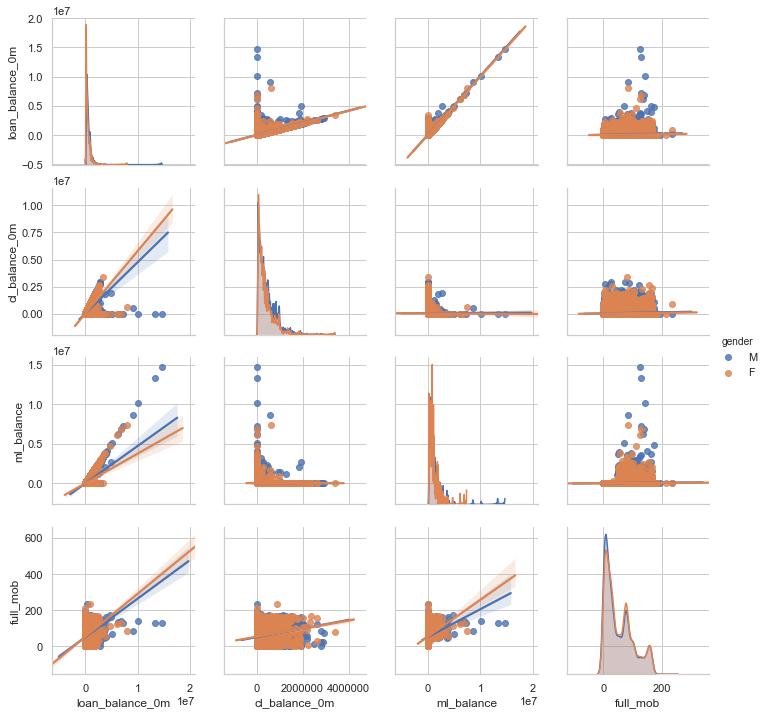

In [69]:
df_items = df.loc[:,['loan_balance_0m','cl_balance_0m', 'ml_balance', 'full_mob', 'gender']]
sns.pairplot(
    df_items,
    hue='gender',
    kind='reg')
plt.show();

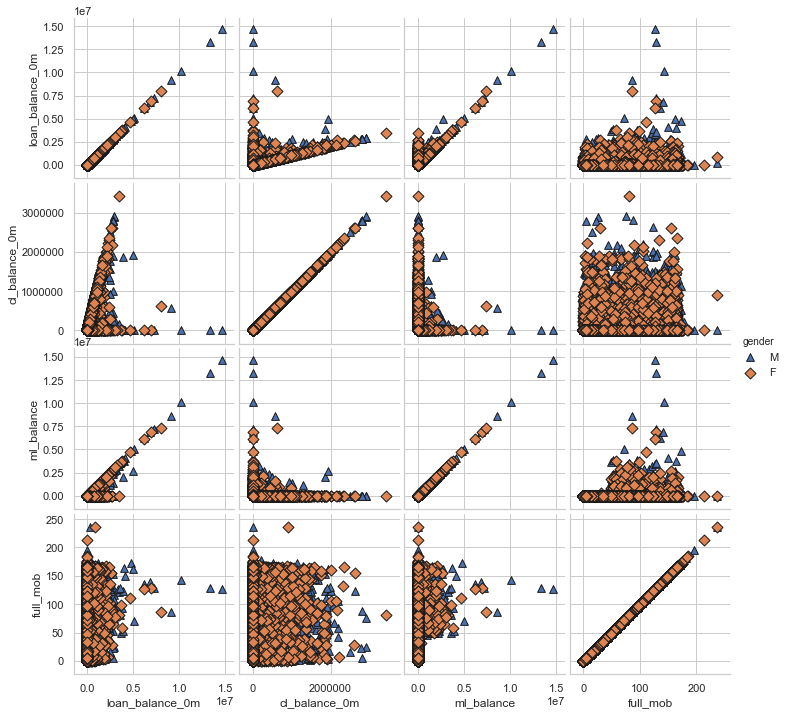

In [78]:
g = sns.PairGrid(
    df_items, 
    hue='gender', 
    hue_kws={"marker": ["^", "D"]}, 
       
)
g.map(plt.scatter, edgecolor='k', s=60)
g.add_legend()
g.fig.subplots_adjust(wspace=.03, hspace=.03);

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

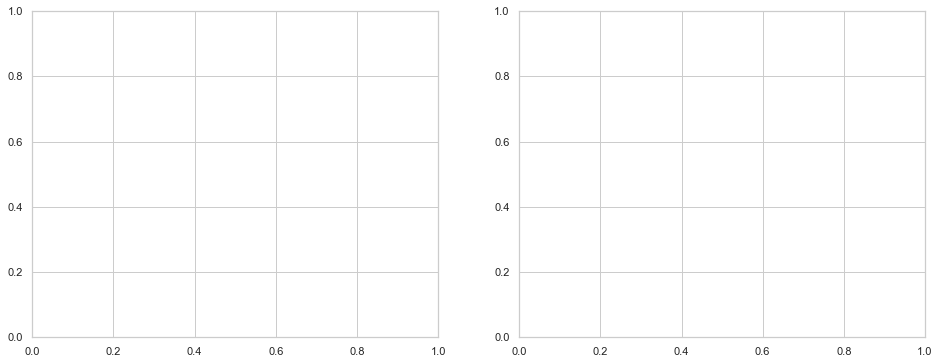

In [84]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6)) 

sns.heatmap(df, annot=True, fmt='.2f',linewidths=.5, cmap="inferno", ax=ax1)
mask = np.zeros_like(df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df, mask=mask, vmax=.3, annot=True, fmt='.2f', cmap="inferno", ax=ax2)
plt.show();